In [1]:
from importlib import reload
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine

def run_backtesting(
    strategy_class, 
    setting=None,
#     vt_symbol="BTC-USD.COINBASE", 
    vt_symbol="BTC-USD.COINBASE", 

    interval="1m", 
    start=datetime(2019, 8, 1), 
    end=datetime(2020, 1, 1), 
    rate=2/10000, 
    slippage=0.5, 
    size=1, 
    pricetick=0.5, 
#     capital=100000
    capital=100
):
    engine = BacktestingEngine()
    
    engine.set_parameters(
        vt_symbol=vt_symbol,
        interval=interval,
        start=start,
        end=end,
        rate=rate,
        slippage=slippage,
        size=size,
        pricetick=pricetick,
        capital=capital
    )

    if setting is None:
        setting = {}
    engine.add_strategy(strategy_class, setting)
    
    engine.load_data()
    engine.run_backtesting()
    df = engine.calculate_result()
    engine.calculate_statistics()
    engine.show_chart()
    
    return df

def show_portfolio(df_list):
    portfolio_df = df_list[0]
    for df in df_list[1:]:
        portfolio_df += df
    
    engine = BacktestingEngine()
    engine.calculate_statistics(portfolio_df)
    engine.show_chart(portfolio_df)

2020-01-08 11:12:14.866679	开始加载历史数据
2020-01-08 11:12:19.444622	加载进度：# [20%]
2020-01-08 11:12:23.914905	加载进度：### [39%]
2020-01-08 11:12:28.386702	加载进度：##### [59%]
2020-01-08 11:12:32.833818	加载进度：####### [78%]
2020-01-08 11:12:37.379590	加载进度：######### [98%]
2020-01-08 11:12:37.818742	加载进度：########## [100%]
2020-01-08 11:12:37.818907	历史数据加载完成，数据量：220156
2020-01-08 11:12:37.864233	策略初始化完成
2020-01-08 11:12:37.864398	开始回放历史数据
2020-01-08 11:12:39.336780	历史数据回放结束
2020-01-08 11:12:39.336943	开始计算逐日盯市盈亏
key date value 2019-08-11
key close_price value 11366.44
key pre_close value 1
key trades value []
key trade_count value 0
key start_pos value 0
key end_pos value 0
key turnover value 0
key commission value 0
key slippage value 0
key trading_pnl value 0
key holding_pnl value 0.0
key total_pnl value 0.0
key net_pnl value 0.0
key date value 2019-08-12
key close_price value 11377.4
key pre_close value 11366.44
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchang

key turnover value 2134556.5
key commission value 426.91130000000004
key slippage value 144.5
key trading_pnl value -788.5800000000736
key holding_pnl value -12121.92000000002
key total_pnl value -12910.500000000095
key net_pnl value -13481.911300000094
key date value 2019-12-30
key close_price value 7234.73
key pre_close value 7383.28
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='110', tradeid='110', direction=<Direction.SHORT: '空'>, offset=<Offset.CLOSE: '平'>, price=7329.0, volume=151, time='08:13:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='111', tradeid='111', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=7305.0, volume=130, time='18:31:00', spread_rate=0)]
key trade_count value 2
key start_pos value 151
key end_pos value -130
key turnover value 2056329.0
key commission value 411.2658
key slippage valu

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


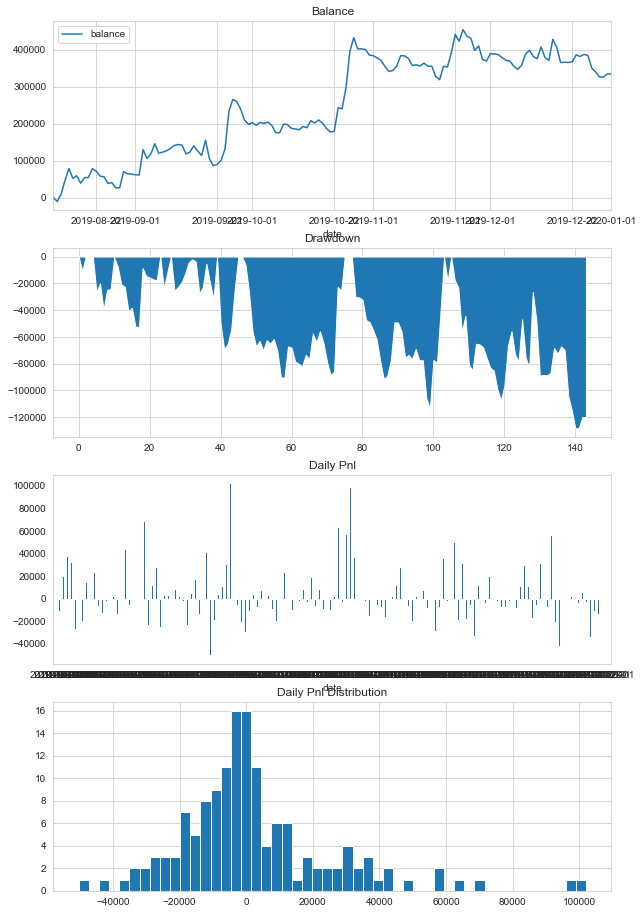

In [2]:
import trend_thrust_strategy
reload(trend_thrust_strategy)
df2 = run_backtesting(trend_thrust_strategy.TrendThrustStrategy)

In [3]:
print(df2.keys)

<bound method NDFrame.keys of             close_price  pre_close  \
date                                 
2019-08-11     11366.44       1.00   
2019-08-12     11377.40   11366.44   
2019-08-13     10890.95   11377.40   
2019-08-14     10461.89   10890.95   
2019-08-15     10092.60   10461.89   
2019-08-16     10398.84   10092.60   
2019-08-17     10322.00   10398.84   
2019-08-18     10399.12   10322.00   
2019-08-19     10717.59   10399.12   
2019-08-20     10729.89   10717.59   
2019-08-21      9973.34   10729.89   
2019-08-22     10107.11    9973.34   
2019-08-23     10412.37   10107.11   
2019-08-24      9998.00   10412.37   
2019-08-25     10070.00    9998.00   
2019-08-26     10326.58   10070.00   
2019-08-27     10174.07   10326.58   
2019-08-28     10232.39   10174.07   
2019-08-29      9503.00   10232.39   
2019-08-30      9589.67    9503.00   
2019-08-31      9604.23    9589.67   
2019-09-01      9625.76    9604.23   
2019-09-02      9909.51    9625.76   
2019-09-03     10699

2020-01-08 11:12:44.957242	开始加载历史数据
2020-01-08 11:12:44.957804	加载进度：# [20%]
2020-01-08 11:12:44.958342	加载进度：### [39%]
2020-01-08 11:12:44.958898	加载进度：##### [59%]
2020-01-08 11:12:44.959708	加载进度：####### [78%]
2020-01-08 11:12:44.960307	加载进度：######### [98%]
2020-01-08 11:12:44.960499	加载进度：########## [100%]
2020-01-08 11:12:44.960518	历史数据加载完成，数据量：220156
2020-01-08 11:12:45.003355	策略初始化完成
2020-01-08 11:12:45.003435	开始回放历史数据
2020-01-08 11:12:46.278410	历史数据回放结束
2020-01-08 11:12:46.278566	开始计算逐日盯市盈亏
key date value 2019-08-11
key close_price value 11366.44
key pre_close value 1
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=11390.0, volume=41, time='00:01:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offs

key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='176', tradeid='176', direction=<Direction.SHORT: '空'>, offset=<Offset.CLOSE: '平'>, price=7381.5, volume=208, time='01:41:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='177', tradeid='177', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=7375.0, volume=66, time='02:01:00', spread_rate=0)]
key trade_count value 2
key start_pos value 208
key end_pos value -66
key turnover value 2022102.0
key commission value 404.42040000000003
key slippage value 137.0
key trading_pnl value 30782.33999999996
key holding_pnl value -66308.31999999999
key total_pnl value -35525.98000000003
key net_pnl value -36067.400400000035
key date value 2019-12-25
key close_price value 7180.99
key pre_close value 7267.59
key trades value []
key trade_count value 0
key start_pos value -66
key end_pos 

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


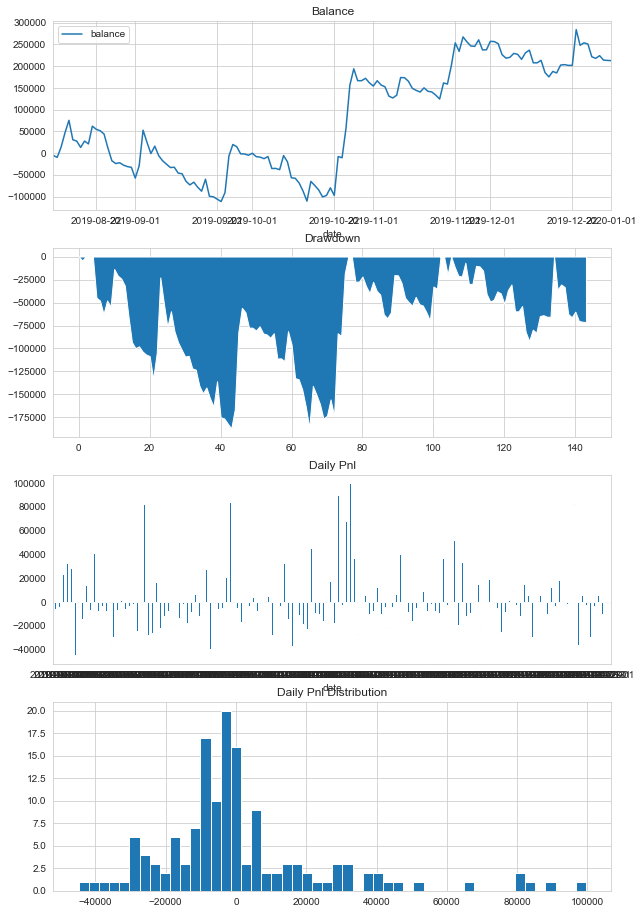

In [4]:
import rsi_momentum_strategy
reload(rsi_momentum_strategy)
df3 = run_backtesting(rsi_momentum_strategy.RsiMomentumStrategy)

2020-01-08 11:12:53.378454	开始加载历史数据
2020-01-08 11:12:53.379376	加载进度：# [20%]
2020-01-08 11:12:53.380724	加载进度：### [39%]
2020-01-08 11:12:53.382876	加载进度：##### [59%]
2020-01-08 11:12:53.384554	加载进度：####### [78%]
2020-01-08 11:12:53.385503	加载进度：######### [98%]
2020-01-08 11:12:53.385605	加载进度：########## [100%]
2020-01-08 11:12:53.385627	历史数据加载完成，数据量：220156
2020-01-08 11:12:53.428720	策略初始化完成
2020-01-08 11:12:53.428821	开始回放历史数据
2020-01-08 11:12:54.693604	历史数据回放结束
2020-01-08 11:12:54.693755	开始计算逐日盯市盈亏
key date value 2019-08-11
key close_price value 11366.44
key pre_close value 1
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=11390.0, volume=39, time='00:01:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offs

key start_pos value 0
key end_pos value 0
key turnover value 784392.0
key commission value 156.8784
key slippage value 56.0
key trading_pnl value 16632.0
key holding_pnl value 0.0
key total_pnl value 16632.0
key net_pnl value 16419.1216
key date value 2019-12-20
key close_price value 7150.96
key pre_close value 7136.01
key trades value []
key trade_count value 0
key start_pos value 0
key end_pos value 0
key turnover value 0
key commission value 0
key slippage value 0
key trading_pnl value 0
key holding_pnl value 0.0
key total_pnl value 0.0
key net_pnl value 0.0
key date value 2019-12-21
key close_price value 7139.0
key pre_close value 7150.96
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='295', tradeid='295', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=7100.0, volume=199, time='17:38:00', spread_rate=0)]
key trade_count value 1
key start_pos value 0
key end_pos value -199
key turnover v

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


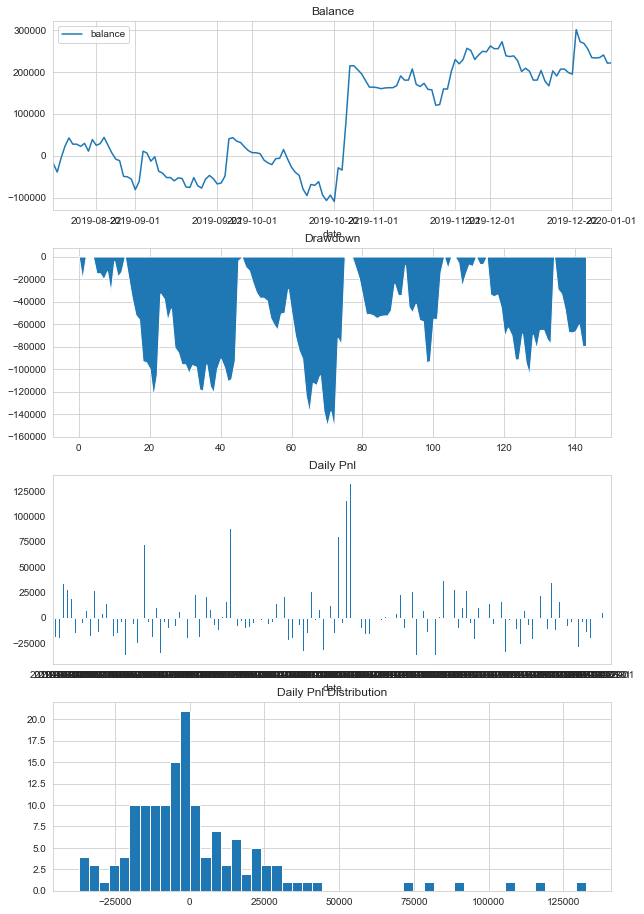

In [5]:
import keltner_bandit_strategy
reload(keltner_bandit_strategy)
df4 = run_backtesting(keltner_bandit_strategy.KeltnerBanditStrategy)

2020-01-08 11:13:00.142612	开始加载历史数据
2020-01-08 11:13:00.143230	加载进度：# [20%]
2020-01-08 11:13:00.144014	加载进度：### [39%]
2020-01-08 11:13:00.144859	加载进度：##### [59%]
2020-01-08 11:13:00.145491	加载进度：####### [78%]
2020-01-08 11:13:00.146336	加载进度：######### [98%]
2020-01-08 11:13:00.146456	加载进度：########## [100%]
2020-01-08 11:13:00.146482	历史数据加载完成，数据量：220156
2020-01-08 11:13:00.189816	策略初始化完成
2020-01-08 11:13:00.189914	开始回放历史数据
2020-01-08 11:13:01.773613	历史数据回放结束
2020-01-08 11:13:01.773780	开始计算逐日盯市盈亏
key date value 2019-08-11
key close_price value 11366.44
key pre_close value 1
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=11206.5, volume=60, time='17:14:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offs

key commission value 793.8854
key slippage value 275.0
key trading_pnl value 9170.200000000063
key holding_pnl value -0.0
key total_pnl value 9170.200000000063
key net_pnl value 8101.314600000063
key date value 2019-12-15
key close_price value 7111.56
key pre_close value 7053.15
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='152', tradeid='152', direction=<Direction.LONG: '多'>, offset=<Offset.CLOSE: '平'>, price=7129.5, volume=172, time='15:45:00', spread_rate=0)]
key trade_count value 1
key start_pos value -172
key end_pos value 0
key turnover value 1226274.0
key commission value 245.25480000000002
key slippage value 86.0
key trading_pnl value -3085.679999999931
key holding_pnl value -10046.520000000131
key total_pnl value -13132.200000000063
key net_pnl value -13463.454800000063
key date value 2019-12-16
key close_price value 7077.01
key pre_close value 7111.56
key trades value []
key trade_count value 0
key

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


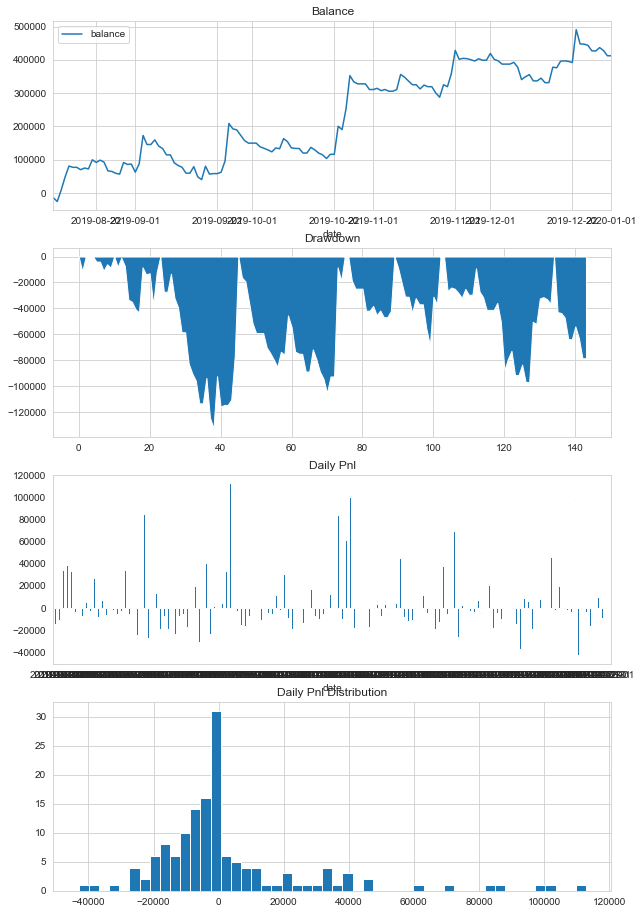

In [6]:
import double_channel_strategy
reload(double_channel_strategy)
df5 = run_backtesting(double_channel_strategy.DoubleChannelStrategy)

2020-01-08 11:13:07.242321	开始加载历史数据
2020-01-08 11:13:07.242984	加载进度：# [20%]
2020-01-08 11:13:07.243571	加载进度：### [39%]
2020-01-08 11:13:07.244348	加载进度：##### [59%]
2020-01-08 11:13:07.244983	加载进度：####### [78%]
2020-01-08 11:13:07.245802	加载进度：######### [98%]
2020-01-08 11:13:07.245896	加载进度：########## [100%]
2020-01-08 11:13:07.245929	历史数据加载完成，数据量：220156
2020-01-08 11:13:07.333926	策略初始化完成
2020-01-08 11:13:07.334074	开始回放历史数据
2020-01-08 11:13:08.562932	历史数据回放结束
2020-01-08 11:13:08.563086	开始计算逐日盯市盈亏
key date value 2019-08-21
key close_price value 9973.34
key pre_close value 1
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=10555.5, volume=48, time='11:33:00', spread_rate=0)]
key trade_count value 1
key start_pos value 0
key end_pos value -48
key turnover value 506664.0
key commission value 101.3328
key slippage value 24.0
key trading_

key trading_pnl value 10437.0
key holding_pnl value 0.0
key total_pnl value 10437.0
key net_pnl value 10250.2414
key date value 2019-12-20
key close_price value 7150.96
key pre_close value 7136.01
key trades value []
key trade_count value 0
key start_pos value 0
key end_pos value 0
key turnover value 0
key commission value 0
key slippage value 0
key trading_pnl value 0
key holding_pnl value 0.0
key total_pnl value 0.0
key net_pnl value 0.0
key date value 2019-12-21
key close_price value 7139.0
key pre_close value 7150.96
key trades value [TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='233', tradeid='233', direction=<Direction.LONG: '多'>, offset=<Offset.OPEN: '开'>, price=7216.0, volume=126, time='04:19:00', spread_rate=0), TradeData(gateway_name='BACKTESTING', symbol='BTC-USD', exchange=<Exchange.COINBASE: 'COINBASE'>, orderid='234', tradeid='234', direction=<Direction.SHORT: '空'>, offset=<Offset.CLOSE: '平'>, price=7162.0, volu

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


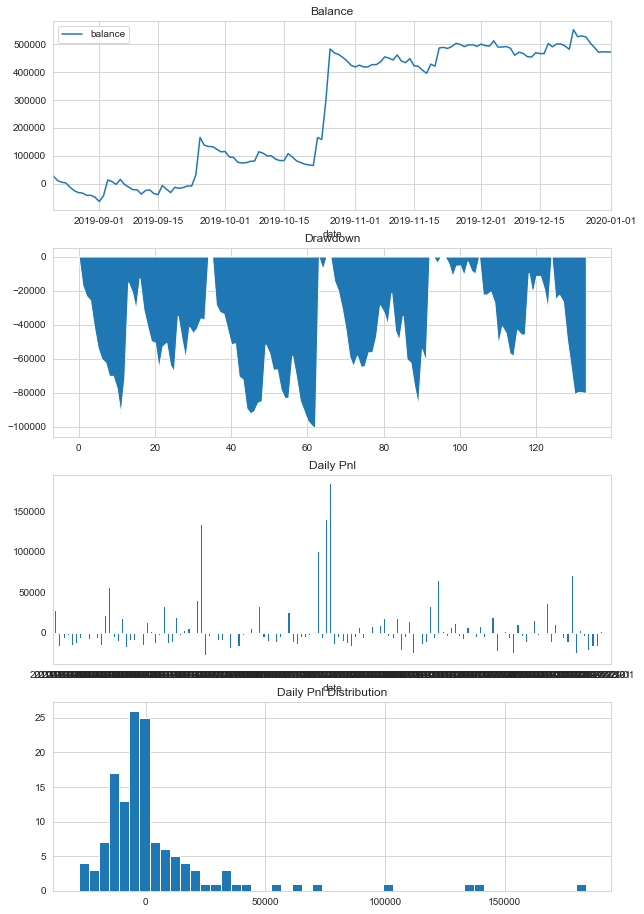

In [7]:
import super_turtle_strategy
reload(super_turtle_strategy)
df1 = run_backtesting(super_turtle_strategy.SuperTurtleStrategy)


2020-01-08 11:13:13.788204	开始计算策略统计指标
2020-01-08 11:13:13.793132	------------------------------
2020-01-08 11:13:13.793231	首个交易日：	2019-08-21
2020-01-08 11:13:13.793248	最后交易日：	2020-01-01
2020-01-08 11:13:13.793262	总交易日：	134
2020-01-08 11:13:13.793276	盈利交易日：	41
2020-01-08 11:13:13.793289	亏损交易日：	93
2020-01-08 11:13:13.793306	起始资金：	1,000.00
2020-01-08 11:13:13.793329	结束资金：	1,493,739.55
2020-01-08 11:13:13.793353	总收益率：	149,273.95%
2020-01-08 11:13:13.793368	年化收益：	267,356.34%
2020-01-08 11:13:13.793382	最大回撤: 	-504,740.32
2020-01-08 11:13:13.793396	百分比最大回撤: -259.47%
2020-01-08 11:13:13.793409	最长回撤天数: 	26
2020-01-08 11:13:13.793422	总盈亏：	1,492,739.55
2020-01-08 11:13:13.793435	总手续费：	162,603.15
2020-01-08 11:13:13.793452	总滑点：	48,409.00
2020-01-08 11:13:13.793466	总成交金额：	813,015,765.00
2020-01-08 11:13:13.793479	总成交笔数：	987.0
2020-01-08 11:13:13.793493	日均盈亏：	11,139.85
2020-01-08 11:13:13.793506	日均手续费：	1,213.46
2020-01-08 11:13:13.793520	日均滑点：	361.26
2020-01-08 11:13:13.793533	日均成交金额：	6,067,281.83
2

/Users/wudi/github/sqt/vnpy1/vnpy/app/cta_strategy/backtesting.py:380: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


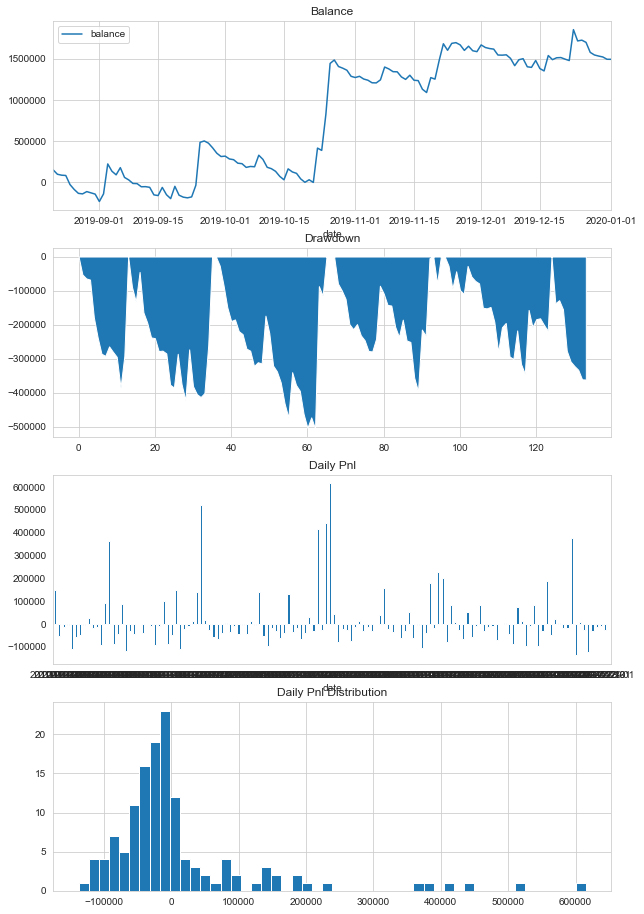

In [8]:
df_list = [df1, df2, df3, df4, df5]
show_portfolio(df_list)